In [ ]:
import datetime
now = datetime.datetime.now()

# Scoring

## Summer School JGU Mainz — Advanced Methods in Behavioral Economics, 2021

### Carina I. Hausladen

In [ ]:
print(now.strftime("%Y-%m-%d"))

In [7]:
import textwrap
import warnings
warnings.simplefilter("ignore")

import matplotlib.colors
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
def dict_to_df_new(d):
    d = {(i, j, k): d[i][j][k]
         for i in d.keys()
         for j in d[i].keys()
         for k in d[i][j].keys()
         for l in d[i][j][k].keys()}
    mux = pd.MultiIndex.from_tuples(d.keys())
    return pd.DataFrame(list(d.values()), index=mux)


def one_pickle_to_df(path_to_pickle):
    results = pd.read_pickle(path_to_pickle)

    scores_df = pd.DataFrame()
    for n in results:
        scores_df = scores_df.append(dict_to_df_new(n))

    return scores_df


def all_comb(d, path):
    columns = ['accuracy', 'precision', 'recall', 'f1score']
    for c in columns:
        d[c].sort_values().plot(kind="barh", title=c, figsize=(20, 20), color="C0", xlim=(0, 1))
        plt.tight_layout()
        plt.savefig(path + c + ".pdf", format="PDF")
        plt.close()


def best_comb(d, level, path):
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["royalblue", "firebrick", "darkorange",
                                                                    "navy"])  # define colors
    d = d.reset_index()
    highest = d.reset_index().groupby(level).idxmax()  # change groupby level to get different variations
    highest2 = d.reset_index().loc[highest["f1score"].values]  # select f1score as performance metric
    highest2["best combination"] = highest2[level].map(str)
    highest2 = highest2.set_index('best combination')
    highest2 = highest2.drop(['level_0', 'level_1', 'level_2', 'index'], axis=1)

    f = plt.figure(figsize=(6, 4))
    ax = highest2.plot(kind='barh', colormap=cmap, ax=f.gca())
    ax.set_yticklabels(textwrap.fill(y.get_text(), 15) for y in ax.get_yticklabels())
    plt.xlim(0.45, 1)
    plt.tight_layout()
    plt.legend()
    plt.ylabel("")

    path_name = path + "best_comb_" + level + ".pdf"
    plt.savefig(path_name, format='pdf')
    # print(highest2)


def best_comb_df(d, level, path):
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["royalblue", "firebrick", "darkorange",
                                                                    "navy"])  # define colors
    d = d.reset_index()
    highest = d.reset_index().groupby(level).idxmax()  # change groupby level to get different variations
    highest2 = d.reset_index().loc[highest["f1score"].values]  # select f1score as performance metric
    highest2["best combination"] = highest2[level].map(str)
    highest2 = highest2.set_index('best combination')
    highest2 = highest2.drop(['level_0', 'level_1', 'level_2', 'index'], axis=1)
    highest2.index.name = None
    return highest2

# Metrics and Scoring
[Koo Ping Shung](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9), [Developers Google](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

Confusion Matrix
```
            P R E D I C T E D 
            
         | Negative       | Positive       |
--------------------------------------------
Negative | True Negative  | False Positive |
Positive | False Negative | True Positive  |
```

## Accuracy
$$ Accuracy = \frac{\text{True Positive} + \text{True Negative}}{\text{True Positive} + \text{False Positive}+\text{True Negative} + \text{False Negative}} $$

## Precision
$$ Precision = \frac{\text{True Positive}}{\text{True Positive} + \text{False Positive}} $$

* Out of those predicted positive, how many of them are actual positive?
* Precision is a good measure to determine, when the costs of False Positive is high. 
* Example: In email spam detection, a false positive means that an email that is non-spam (actual negative) has been identified as spam (predicted spam).

## Recall
$$ Recall = \frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}} $$

* How many of the actual positives our model capture through labeling it as positive?
* Recall shall be the model metric when there is a high cost associated with false negative.
* Example: If a sick patient (actual positive) goes through the test and predicted as not sick (predicted negative). The cost associated with false negative will be extremely high if the sickness is contagious.

## F1 Score
$$ F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $$

The F1 Score seeks balance between precision and recall if there is an uneven class distribution.

# Plot Loop Results

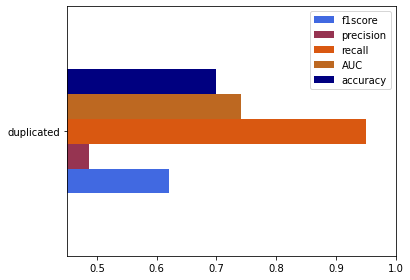

Best accuracy: 0.6986301369863013
Best parameter combination: ('duplicated', '<10', 'chat_subject')


In [18]:
results_2 = one_pickle_to_df('data/interim/df_y_x_over.pickle')

all_comb(results_2, "data/interim/")
best_comb(results_2, "level_0", "data/interim/")
plt.show()

result_wo_label = results_2[results_2.index.get_level_values(2) != "label_group"]
df2 = best_comb_df(result_wo_label, "level_1", "data/interim/")
df2 = best_comb_df(results_2, "level_2", "data/interim/")

print("Best accuracy:", results_2.accuracy.max())
print("Best parameter combination:", results_2['accuracy'].idxmax())

plt.show()

## ROC AUC

### ROC 
* An ROC curve (receiver operating characteristic curve) shows the performance of a model at all classification thresholds. 
* The curve plots two parameters:

$$\text{True Positive Rate (Recall)} = \frac{TP} {TP + FN}$$
$$\text{False Positive Rate} = \frac{FP} {FP + TN}$$



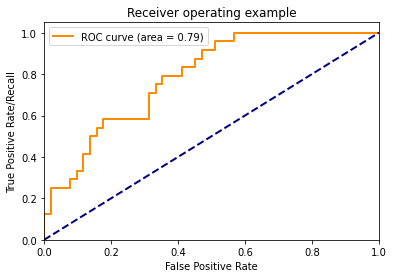

In [1]:
from utils.roc_example import plot_roc_example
plot_roc_example()

### AUC
* AUC stands for "Area under the ROC Curve." 
* It measures the area underneath the ROC curve.
* AUC provides an aggregate measure of performance across all possible classification thresholds. 
* Interpretation: The probability that the model ranks a random positive example more highly than a random negative example. 
* AUC ranges in value from 0 to 1. 
* A model whose predictions are 100% wrong has an AUC of 0.0
* One whose predictions are 100% correct has an AUC of 1.0.

* Example:
    * Predictions in ascending order of a logistic regression: <br>
`N N N N N N N N N P N N N P N P P P P P P` 
    * AUC represents the probability that a random positive (`P`) example is positioned to the right of a random negative (`N`) example.

* Advantages
    * Scale-invariant: It measures how well predictions are ranked, rather than their absolute values.
    * Classification-threshold-invariant: It measures the quality of the model's predictions irrespective of what classification threshold is chosen.

* Disadvantages
    * Scale invariance is not always desirable. For example, sometimes we really do need well calibrated probability outputs, and AUC won’t tell us about that. 
    * Classification-threshold invariance is not always desirable. In cases where there are wide disparities in the cost of false negatives vs. false positives, it may be critical to minimize one type of classification error. For example, when doing email spam detection, you likely want to prioritize minimizing false positives (even if that results in a significant increase of false negatives). AUC isn't a useful metric for this type of optimization.

# Comparing Performance Across and Within Datasets
[Straube and Krell (2014)](https://www.frontiersin.org/articles/10.3389/fncom.2014.00043/full)

* The F1 score should be the preferred metric to evaluate a model's performance *within* one dataset
* An independent prevalence metric should be consulted when comparing models *across* datasets. 
* The F1 score is solely interested in the performance of the positive class. Therefore, it is sensitive to different class distributions when different data sets are compared. 
* By contrast, AUC is prevalence independent because this measure is built from a separate evaluation of the two classes. 
* AUC is our metric of choice when comparing a model's performance across different thresholds to binarize y, and across two experimental data sets.